<a href="https://colab.research.google.com/github/Cours-EDUlib/FAS-ISDS/blob/main/module-7/Applications/7-1_syntaxe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module 7: Les statistiques et la science des données appliquées
##Application 1: régression linéaire simple avec VI continue
###Syntaxe de l'exemple présenté

In [ ]:
#Téléchargement des packages nécessaires
library (tidyverse)
install.packages("rsq")
require(rsq)
library(ggplot2)
install.packages("descr")
require(descr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘lme4’, ‘numDeriv’


Loading required package: rsq



Pour ce premier exemple, nous utilisons une base de données qui est composée de données concernant les États américains. On s'intéresse précisément au taux de chômage et au taux de décrochage scolaire au sein de chacun des états. Nous essaierons de voir s'il y a une relation entre ces deux variables. 

In [ ]:
path_to_csv = 'https://github.com/Cours-EDUlib/FAS-ISDS/blob/main/module-7/Applications/7-1-2_donnees.csv?raw=true' #Téléchargement de la base de données depuis github

bd <- read_csv(path_to_csv) #Enregistrement de la base de données dans l'ojet "bd"
bd #Lecture des données


── Column specification ────────────────────────────────────────────────────────
cols(
  st = col_double(),
  state = col_character(),
  region4 = col_double(),
  scs134 = col_double(),
  scs155 = col_double(),
  crc402 = col_double(),
  jbs170 = col_double(),
  pvs501 = col_double(),
  dms451 = col_double(),
  scs142 = col_double(),
  hts384 = col_double(),
  dms439 = col_double()
)




st,state,region4,scs134,scs155,crc402,jbs170,pvs501,dms451,scs142,hts384,dms439
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ALABAMA,3,12.6,1.9,5662.3,5.0,20.1,25.56,4295,9.4,60.4
2,ALASKA,4,9.6,3.1,6921.2,15.2,7.1,4.30,8353,3.3,67.5
3,ARIZONA,4,14.3,2.0,8703.6,5.2,16.1,3.46,4012,10.6,87.5
4,ARKANSAS,3,10.9,2.1,6178.1,5.2,14.9,15.86,4086,6.2,53.5
5,CALIFORNIA,4,14.3,1.9,5877.7,6.9,16.7,7.64,4878,21.5,92.6
6,COLORADO,4,9.6,2.6,5677.9,3.7,8.8,4.38,5086,10.5,82.4
7,CONNECTICUT,1,9.2,4.2,4662.8,5.1,9.7,9.16,8270,17.2,79.1
8,DELAWARE,3,11.2,1.8,5379.1,5.4,10.3,18.27,6944,19.4,73.0
9,DISTRICT OF COLUMBIA,3,19.1,3.1,12173.5,7.3,22.2,63.54,6767,116.8,100.0


Voici les variables à l'étude dans cet exemple:
- jbs170: taux de chômage par état en pourcentage
- scs134: taux de décrochage scolaire par état en pourcentage

Commençons par produire quelques statistiques descriptives de base pour se familiariser avec les variables à l’étude:
  - La moyenne
  - La médiane
  - Le minimum
  - Le maximum
  - l'écart-type

In [ ]:
#Statistiques descriptives

summary(bd$scs134)
sd(bd$scs134)

summary(bd$jbs170)
sd(bd$jbs170)

ERROR: ignored

Interprétation:

Le taux de décrochage scolaire varie de 4,3% à 19,1%, avec une moyenne de 10,28% et un écart-type de 2,75% autour de la moyenne. Du côté du taux de chômage, il varie de 2,7% et 15,2%, avec une moyenne de 5,02% et un écart-type de 1,84%. 

Par la suite, nous produisons des histogrammes, pour vérifier si les variables respectent le postulat de normalité de distribution. 

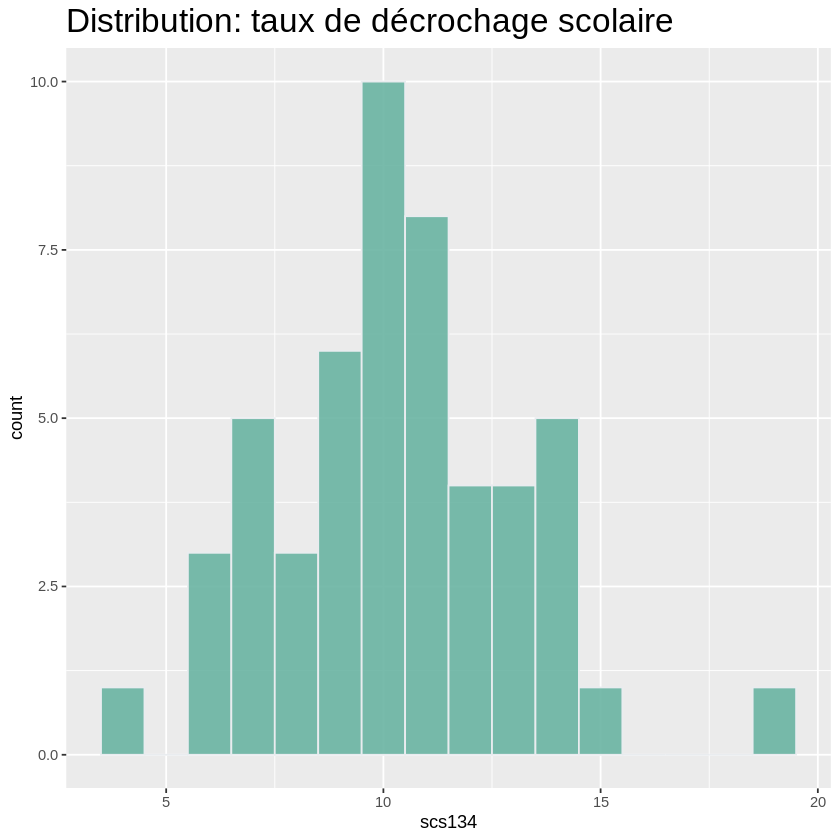

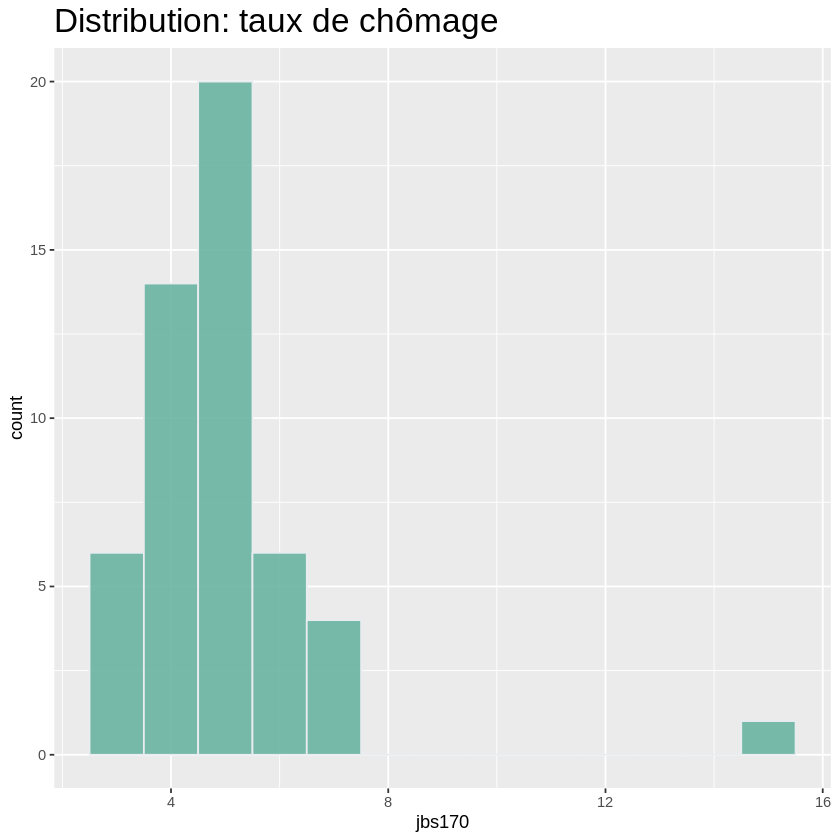

In [ ]:
#Histogramme pour vérification du postulat de normalité

ggplot(bd, aes(x=scs134)) +
  geom_histogram(binwidth=1, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
    ggtitle("Distribution: taux de décrochage scolaire") +
    theme(
      plot.title = element_text(size=20)
    )

ggplot(bd, aes(x=jbs170)) +
  geom_histogram(binwidth=1, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
    ggtitle("Distribution: taux de chômage") +
    theme(
      plot.title = element_text(size=20)
    )

Interprétation:

Pour le taux de chômage, la distribution n’est pas tout à fait normale, surtout en raison d’un état qui semble avoir un taux de chômage beaucoup plus élevé que l'ensemble des autres (autour de 15). En faisant abstraction de cet état, le reste de la distribution semble normale, avec des résultats qui varie entre 2,5 et 7,5%. On considère donc que le postulat est respecté.

Pour le taux de décrochage scolaire, l'histogramme montre une distribution très proche d’une distribution normale: le postulat est respecté.

Les deux variables sont distribuées assez normalement, donc on peut les utiliser pour faire une analyse de régression linéaire. 

Enfin, pour avoir un aperçu de la relation entre les variables, nous produisons un graphique de dispersion, ou nuage de points.

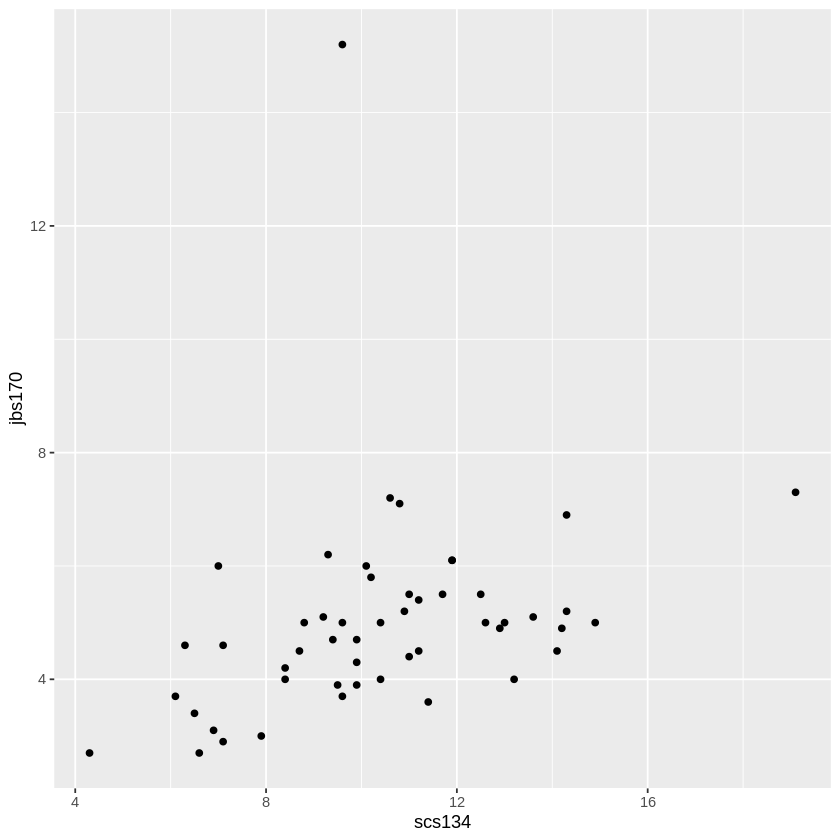

In [ ]:
#Nuage de points
ggplot(bd, aes(x=scs134, y=jbs170)) + 
    geom_point()

Interprétation:

Le nuage de point représente la relation entre le taux de décrochage scolaire, la variable indépendante placée sur l’axe des X, et le taux de chômage, la variable dépendante placée sur l’axe des Y. Chaque point représente un état. On aperçoit  une tendance générale positive, où le taux de chômage augmente avec le taux de décrochage scolaire. Donc plus le taux de décrochage est élevé, plus le taux de chômage l’est également et vice-versa. Toutefois, quelques points semblent s’éloigner du nuage de tendance générale, dont une donnée au sommet du graphique qui semble correpondre à une donnée extrême (voir capsule 7.2).

Nous pouvons finalement passer à l’analyse de régression en tant que telle.

On produit également les résidus standardisés pour compléter les statistiques de résidus automatiquement produites par la procédure glm.

In [ ]:
#Faire la régression linéaire

reglineaire <- glm(jbs170 ~ scs134, data = bd, family="gaussian")
summary(rstandard(reglineaire))
summary(reglineaire)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.934088 -0.533172 -0.233487 -0.001841  0.196549  5.936183 


Call:
glm(formula = jbs170 ~ scs134, family = "gaussian", data = bd)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6271  -0.9204  -0.4051   0.3424  10.3461  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  2.86367    0.97099   2.949  0.00487 **
scs134       0.20732    0.09047   2.291  0.02627 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 3.103496)

    Null deviance: 168.37  on 50  degrees of freedom
Residual deviance: 152.07  on 49  degrees of freedom
AIC: 206.45

Number of Fisher Scoring iterations: 2


Interprétation:

La régression linéaire sert à qualifier, par une droite, le nuage de points produit auparavant. On s'attendait donc à observer une relation significative positive. Lorsque le taux de décrochage scolaire est élevé, on peut s’attendre à un taux de chômage élevé également.

La constante nous indique que dans un état hypothétique au taux de décrochage de 0, le taux de chômage serait de 2,86%. Le coefficient de la variable indépendante, nous prouve l'existence d'une relation positive, de sorte que le taux de chômage augmente d’environ 0,21% pour chaque augmentation d’une unité du taux de décrochage scolaire. La relation est donc faible, mais positive, et surtout significative (p < 0.05). Ces résultats sont cohérents avec ce qu’on a observé dans le nuage de point précédemment.


In [ ]:
#Calcul du r-carré
rsq(reglineaire)

[1] 0.09678918

Interprétation:

Environ 10% de la variance du taux de chômage est expliqué par le taux de décrochage scolaire.